In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d tanlikesmath/the-oxfordiiit-pet-dataset

the-oxfordiiit-pet-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/the-oxfordiiit-pet-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import os
import glob

In [ ]:
images_fp='/content/images'

In [ ]:
images_fp

'/content/images'

In [ ]:
images_names=[os.path.basename(file) for file in glob.glob(os.path.join(images_fp,'*.jpg'))]

In [ ]:
images_names

['samoyed_86.jpg',
 'Bombay_145.jpg',
 'basset_hound_107.jpg',
 'pug_2.jpg',
 'pomeranian_16.jpg',
 'Bengal_46.jpg',
 'newfoundland_29.jpg',
 'great_pyrenees_160.jpg',
 'Egyptian_Mau_76.jpg',
 'english_setter_106.jpg',
 'leonberger_97.jpg',
 'Bengal_122.jpg',
 'great_pyrenees_11.jpg',
 'yorkshire_terrier_60.jpg',
 'Abyssinian_207.jpg',
 'german_shorthaired_103.jpg',
 'german_shorthaired_19.jpg',
 'Persian_76.jpg',
 'Maine_Coon_102.jpg',
 'Ragdoll_115.jpg',
 'pug_37.jpg',
 'japanese_chin_149.jpg',
 'german_shorthaired_184.jpg',
 'shiba_inu_111.jpg',
 'great_pyrenees_23.jpg',
 'english_cocker_spaniel_138.jpg',
 'samoyed_5.jpg',
 'Persian_47.jpg',
 'basset_hound_114.jpg',
 'great_pyrenees_30.jpg',
 'Egyptian_Mau_119.jpg',
 'Bengal_111.jpg',
 'german_shorthaired_150.jpg',
 'saint_bernard_111.jpg',
 'Egyptian_Mau_7.jpg',
 'saint_bernard_59.jpg',
 'Bengal_3.jpg',
 'Persian_156.jpg',
 'saint_bernard_187.jpg',
 'newfoundland_62.jpg',
 'samoyed_118.jpg',
 'miniature_pinscher_96.jpg',
 'Birman_8

In [ ]:
len(images_names)

7390

In [ ]:
labels=[' '.join(name.split('_')[:-1:]) for name in images_names]

In [ ]:
labels

['samoyed',
 'Bombay',
 'basset hound',
 'pug',
 'pomeranian',
 'Bengal',
 'newfoundland',
 'great pyrenees',
 'Egyptian Mau',
 'english setter',
 'leonberger',
 'Bengal',
 'great pyrenees',
 'yorkshire terrier',
 'Abyssinian',
 'german shorthaired',
 'german shorthaired',
 'Persian',
 'Maine Coon',
 'Ragdoll',
 'pug',
 'japanese chin',
 'german shorthaired',
 'shiba inu',
 'great pyrenees',
 'english cocker spaniel',
 'samoyed',
 'Persian',
 'basset hound',
 'great pyrenees',
 'Egyptian Mau',
 'Bengal',
 'german shorthaired',
 'saint bernard',
 'Egyptian Mau',
 'saint bernard',
 'Bengal',
 'Persian',
 'saint bernard',
 'newfoundland',
 'samoyed',
 'miniature pinscher',
 'Birman',
 'scottish terrier',
 'Abyssinian',
 'Russian Blue',
 'Ragdoll',
 'Bombay',
 'Bombay',
 'boxer',
 'american bulldog',
 'boxer',
 'Egyptian Mau',
 'chihuahua',
 'Sphynx',
 'american pit bull terrier',
 'pomeranian',
 'Bombay',
 'staffordshire bull terrier',
 'boxer',
 'staffordshire bull terrier',
 'Bengal',
 

In [ ]:
set(labels)

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Egyptian Mau',
 'Maine Coon',
 'Persian',
 'Ragdoll',
 'Russian Blue',
 'Siamese',
 'Sphynx',
 'american bulldog',
 'american pit bull terrier',
 'basset hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english cocker spaniel',
 'english setter',
 'german shorthaired',
 'great pyrenees',
 'havanese',
 'japanese chin',
 'keeshond',
 'leonberger',
 'miniature pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint bernard',
 'samoyed',
 'scottish terrier',
 'shiba inu',
 'staffordshire bull terrier',
 'wheaten terrier',
 'yorkshire terrier'}

In [ ]:
len(set(labels))

37

In [ ]:
def label_encode(label):
  if label=='Abyssinian' : return 0
  elif label=='Bengal' : return 1
  elif label=='Birman' : return 2
  elif label=='Bombay' : return 3
  elif label=='British Shorthair' : return 4
  elif label=='Egyptian Mau' : return 5
  elif label=='Maine Coon' : return 6
  elif label=='Persian' : return 7
  elif label=='Ragdoll': return 8
  elif label=='Russian Blue': return 9
  elif label=='Siamese': return 10
  elif label=='Sphynx': return 11
  elif label=='american bulldog': return 12
  elif label=='american pit bull terrier' : return 13
  elif label=='basset hound': return 14
  elif label=='beagle': return 15

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
features=[]
labels=[]
IMAGE_SIZE=(224,224)

for name in images_names:
  label=' '.join(name.split('_')[:-1:])
  label_encoded=label_encode(label)
  if label_encoded != None:
    img=load_img(os.path.join(images_fp,name))
    img=tf.image.resize_with_pad(img_to_array(img,dtype='uint8'),*IMAGE_SIZE).numpy().astype('uint8')
    image= np.array(img)
    features.append(image)
    labels.append(label_encoded)

In [ ]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [ ]:
labels

[3,
 14,
 1,
 5,
 1,
 0,
 7,
 6,
 8,
 7,
 14,
 5,
 1,
 5,
 1,
 7,
 2,
 0,
 9,
 8,
 3,
 3,
 12,
 5,
 11,
 13,
 3,
 1,
 6,
 6,
 12,
 3,
 7,
 2,
 14,
 1,
 15,
 13,
 3,
 1,
 9,
 8,
 13,
 3,
 14,
 12,
 9,
 15,
 11,
 2,
 3,
 10,
 13,
 8,
 6,
 9,
 2,
 5,
 7,
 4,
 1,
 7,
 12,
 1,
 9,
 10,
 15,
 6,
 9,
 13,
 3,
 1,
 2,
 5,
 11,
 1,
 2,
 11,
 11,
 13,
 10,
 4,
 11,
 12,
 1,
 15,
 8,
 0,
 12,
 8,
 7,
 7,
 1,
 5,
 7,
 7,
 13,
 7,
 1,
 9,
 8,
 9,
 14,
 8,
 12,
 8,
 5,
 3,
 2,
 11,
 8,
 6,
 1,
 15,
 0,
 11,
 2,
 4,
 4,
 6,
 3,
 8,
 10,
 10,
 13,
 6,
 8,
 9,
 15,
 15,
 4,
 2,
 11,
 8,
 6,
 4,
 15,
 3,
 10,
 12,
 11,
 10,
 13,
 4,
 13,
 9,
 15,
 6,
 6,
 8,
 10,
 9,
 14,
 6,
 10,
 4,
 7,
 1,
 4,
 15,
 0,
 10,
 10,
 5,
 12,
 14,
 12,
 13,
 10,
 9,
 9,
 5,
 0,
 13,
 6,
 13,
 2,
 2,
 0,
 5,
 10,
 2,
 1,
 0,
 4,
 7,
 2,
 1,
 9,
 2,
 15,
 8,
 0,
 3,
 15,
 14,
 6,
 13,
 13,
 14,
 7,
 13,
 0,
 12,
 1,
 13,
 2,
 5,
 7,
 3,
 12,
 8,
 7,
 1,
 11,
 8,
 0,
 2,
 7,
 15,
 12,
 5,
 3,
 13,
 3,
 7,
 10,
 10,
 6,
 6,
 

In [ ]:
len(labels)

3200

In [ ]:
features_array = np.array(features)
labels_array=np.array(labels)

In [ ]:
labels_one_hot=pd.get_dummies(labels_array)

In [ ]:
labels_one_hot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3197,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3198,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features_array,labels_one_hot,test_size=0.2,random_state=42)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [ ]:
len(y_train)

1920

In [ ]:
len(y_val)

640

In [ ]:
len(y_test)

640

In [ ]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomRotation, RandomFlip, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"),RandomRotation(0.2)])
prediction_layers= Dense(16,activation="softmax")

In [ ]:
resnet_model= ResNet50(include_top=False, pooling="avg",weights='imagenet')
resnet_model.trainable=False
preprocess_input=pp_i

In [ ]:
inputs = Input(shape=(224,224,3))
x=data_augmentation(inputs)
x=preprocess_input(x)
x=resnet_model(x,training=False)
x=Dropout(0.2)(x)
outputs=prediction_layers(x)
model=Model(inputs,outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 224, 224, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 224, 224, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0     

In [ ]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model_history = model.fit(x=X_train,y=y_train, validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
60/60 [==============================] - 623s 10s/step - loss: 1.7797 - accuracy: 0.4339 - val_loss: 0.7074 - val_accuracy: 0.8016
Epoch 2/10
60/60 [==============================] - 616s 10s/step - loss: 0.8386 - accuracy: 0.7130 - val_loss: 0.5540 - val_accuracy: 0.8406
Epoch 3/10
60/60 [==============================] - 571s 10s/step - loss: 0.6588 - accuracy: 0.7729 - val_loss: 0.4573 - val_accuracy: 0.8469
Epoch 4/10
60/60 [==============================] - 564s 9s/step - loss: 0.5371 - accuracy: 0.8104 - val_loss: 0.4101 - val_accuracy: 0.8703
Epoch 5/10
60/60 [==============================] - 557s 9s/step - loss: 0.4962 - accuracy: 0.8349 - val_loss: 0.3995 - val_accuracy: 0.8813
Epoch 6/10
60/60 [==============================] - 565s 9s/step - loss: 0.4519 - accuracy: 0.8438 - val_loss: 0.3733 - val_accuracy: 0.8719
Epoch 7/10
60/60 [==============================] - 557s 9s/step - loss: 0.4181 - accuracy: 0.8521 - val_loss: 0.3940 - val_accuracy: 0.8625
Epoch 8/10

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

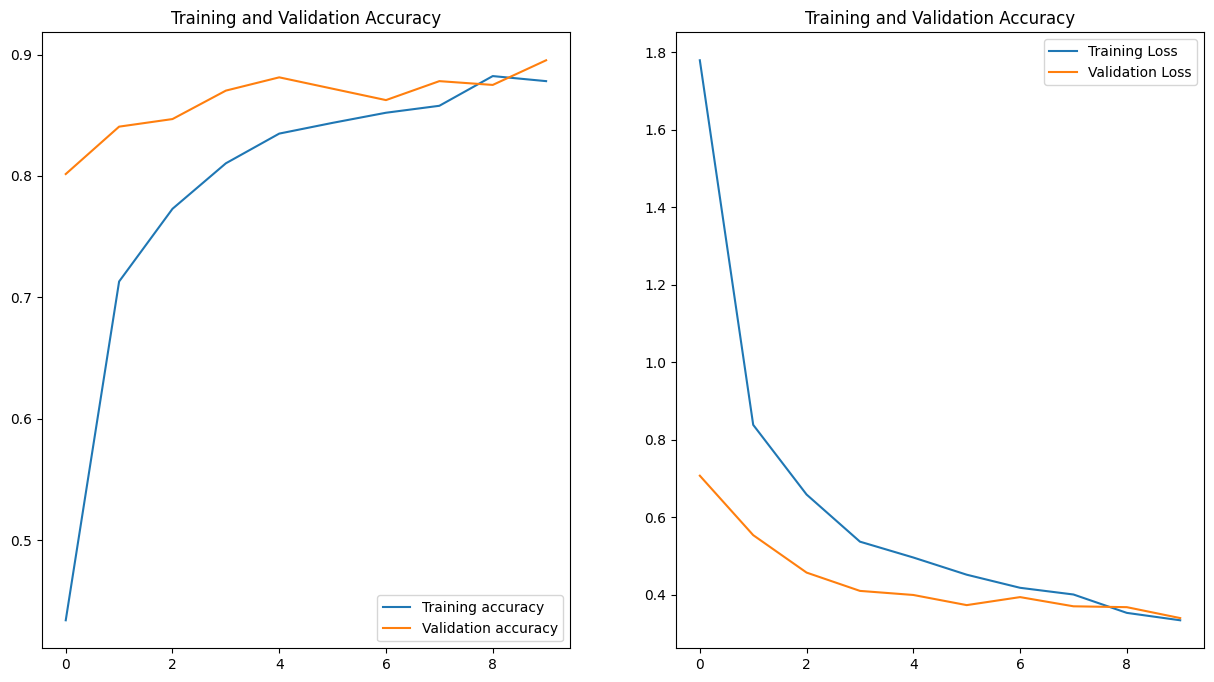

In [ ]:
epochs_range=range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training accuracy')
plt.plot(epochs_range,val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

In [ ]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 156s 8s/step - loss: 0.2887 - accuracy: 0.9047


[0.28866180777549744, 0.9046875238418579]

In [ ]:
y_pred= model.predict(X_test)

20/20 [==============================] - 154s 8s/step


In [ ]:
y_pred

array([[3.2770765e-06, 1.8730789e-06, 1.9542322e-06, ..., 2.3307909e-06,
        3.6247147e-07, 8.7610204e-07],
       [4.4208777e-05, 9.8059093e-07, 1.2049961e-01, ..., 8.7975587e-07,
        2.1517135e-05, 1.8525912e-05],
       [1.7867880e-05, 5.2085547e-06, 9.4565994e-01, ..., 6.8227354e-07,
        6.2125355e-06, 8.9162149e-06],
       ...,
       [9.2707312e-04, 9.8303030e-04, 7.8733567e-05, ..., 6.0623509e-01,
        4.3347984e-04, 1.7666666e-02],
       [1.7637812e-04, 1.6526652e-05, 4.4088555e-09, ..., 1.5138996e-06,
        1.0986768e-06, 1.5938963e-06],
       [9.9465078e-01, 7.5987185e-04, 3.9376164e-06, ..., 6.8887421e-06,
        1.9653547e-05, 4.3465585e-05]], dtype=float32)